In [3]:
pip install oauth2client

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install gspread

     -------------------------------------- 40.5/40.5 kB 976.6 kB/s eta 0:00:00
     -------------------------------------- 177.2/177.2 kB 5.4 MB/s eta 0:00:00
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import gspread
from oauth2client import service_account
from oauth2client.service_account import ServiceAccountCredentials
import seaborn as sns

In [6]:
# json file import

gc = gspread.service_account(filename = "C:/Users/Raj tripathi/Downloads/investment-advisor-2022-d4f014ecec15.json")
gc

In [7]:
# Establish the connection
data =gc.open('investment_ad')
data

<Spreadsheet 'investment_ad' id:1kVBy-4EakywRiqmD6y4agFqS5A_PbNM-2H-XX_K8S1c>

In [8]:


stock = data.worksheet('bse500')                       ## stocks table
income_expense = data.worksheet('income/expense')       ## Income/expense table
final_table = data.worksheet('Final_sheet')            ## Final Report

In [9]:
df_stocks = pd.DataFrame(stock.get_all_records())

In [10]:
df_income_expense = pd.DataFrame(income_expense.get_all_records())

In [11]:
df_income_expense

,Date,Account 1,Category,Subcategory,Note 1,INR,Income/Expense,Note,Amount,Currency,Account
0,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50.0,Expense,,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300.0,Expense,,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78.0,Expense,,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30.0,Expense,,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,,Snacks,67.0,Expense,,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,,Dinner,90.0,Expense,,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,,Lunch with company,97.0,Expense,,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,,Rapido,130.0,Expense,,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,,Lunch,875.0,Expense,,875.0,INR,875.0


In [12]:
### Net Income calculation

In [13]:
df_income_expense.head(10)

,Date,Account 1,Category,Subcategory,Note 1,INR,Income/Expense,Note,Amount,Currency,Account
0,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50.00,Expense,,50.00,INR,50.00
1,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300.00,Expense,,300.00,INR,300.00
2,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78.00,Expense,,78.00,INR,78.00
3,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30.00,Expense,,30.00,INR,30.00
4,3/1/2022 18:22,CUB - online payment,Food,,Snacks,67.00,Expense,,67.00,INR,67.00
5,3/1/2022 18:22,CUB - online payment,Other,,From vicky,100.00,Income,,100.00,INR,100.00
6,3/1/2022 18:21,CUB - online payment,Other,,From dad,500.00,Income,,500.00,INR,500.00
7,2/28/2022 11:56,CUB - online payment,Food,,Pizza,339.15,Expense,,339.15,INR,339.15
8,2/28/2022 11:45,CUB - online payment,Other,,From kumara,200.00,Income,,200.00,INR,200.00
9,2/27/2022 15:29,CUB - online payment,Food,,Lunch,243.00,Expense,,243.00,INR,243.00


In [14]:
income_filter = df_income_expense[df_income_expense['Income/Expense'] =='Income']


In [15]:
net_income = income_filter['INR'].sum()
net_income

54754.0

In [16]:
expense_filter = df_income_expense[df_income_expense['Income/Expense'] == 'Expense']

In [17]:
net_expense = expense_filter['INR'].sum()
net_expense

59024.0

In [18]:
investment_fund = net_income - net_expense
investment_fund

-4270.0

In [19]:
##Food
Food = df_income_expense[df_income_expense['Category'] == 'Food']
Food_sum = Food['INR'].sum()
Food_sum


24502.48

In [20]:
## Other
Other = df_income_expense[df_income_expense['Category'] == 'Other']
other_sum = Other['INR'].sum()
other_sum


37868.0

In [21]:
## Transportation
Transportation = df_income_expense[df_income_expense['Category'] == 'Transportation']
Transportation_sum = Transportation['INR'].sum()
Transportation_sum


9203.8

In [22]:
## Social Life
Social_Life = df_income_expense[df_income_expense['Category'] == 'Social Life']
Social_Life_sum = Social_Life['INR'].sum()
Social_Life_sum

2513.7200000000003

In [23]:
## Household
Household = df_income_expense[df_income_expense['Category'] == 'Household']
Household_sum = Household['INR'].sum()
Household_sum

12188.0

In [24]:
## Apparel
Apparel = df_income_expense[df_income_expense['Category'] == 'Apparel']
Apparel_sum = Apparel['INR'].sum()
Apparel_sum

3388.0

In [25]:
## Education
Education = df_income_expense[df_income_expense['Category'] == 'Education']
Education_sum = Education['INR'].sum()
Education_sum

1400.0

In [26]:
## Education
Salary = df_income_expense[df_income_expense['Category'] == 'Salary']
Salary_sum = Salary['INR'].sum()
Salary_sum

8000.0

In [27]:
## Allowance
Allowance = df_income_expense[df_income_expense['Category'] == 'Allowance']
Allowance_sum = Allowance['INR'].sum()
Allowance_sum

14000.0

In [28]:
## Beauty
Beauty = df_income_expense[df_income_expense['Category'] == 'Beauty']
Beauty_sum = Beauty['INR'].sum()
Beauty_sum

196.0

In [29]:
## Gift
Gift = df_income_expense[df_income_expense['Category'] == 'Gift']
Gift_sum = Gift['INR'].sum()
Gift_sum

115.0

In [30]:
## Petty cash
Petty_cash = df_income_expense[df_income_expense['Category'] == 'Petty cash']
Petty_cash_sum = Petty_cash['INR'].sum()
Petty_cash_sum

3.0

### FIll Data in Final_report

In [31]:
net_expense

59024.0

In [32]:
wks = gc.open('investment_ad')
final = wks.worksheet('Final_sheet')


In [33]:
final.update_cell(7,3,net_income)
final.update_cell(8,3,net_expense)

{'spreadsheetId': '1kVBy-4EakywRiqmD6y4agFqS5A_PbNM-2H-XX_K8S1c',
 'updatedRange': 'Final_sheet!C8',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [34]:
# cell_list = final.range('C10:C21')
# final.update_cells(cell_list)

In [35]:
final.update("C10:C21",[[Food_sum],[other_sum],[Transportation_sum],[Social_Life_sum],[Household_sum],[Apparel_sum],[Education_sum],[Salary_sum],[Allowance_sum],[Beauty_sum],[Gift_sum],[Petty_cash_sum]])

{'spreadsheetId': '1kVBy-4EakywRiqmD6y4agFqS5A_PbNM-2H-XX_K8S1c',
 'updatedRange': 'Final_sheet!C10:C21',
 'updatedRows': 12,
 'updatedColumns': 1,
 'updatedCells': 12}

In [36]:
### 

final.update_cell(24,3,investment_fund)

{'spreadsheetId': '1kVBy-4EakywRiqmD6y4agFqS5A_PbNM-2H-XX_K8S1c',
 'updatedRange': 'Final_sheet!C24',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [37]:
df_stocks

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
0,Sanofi India Ltd.,500674,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.59,6086.30,...,7.95,16.68,4.98,25.39,425.09,631.65,242.96,459.22,490.0,0.28
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.0,0.03
2,Procter & Gamble Hygiene & Health Care Ltd.,500459,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.24,12801.00,...,1.13,52.71,12.1,53.17,177.37,227.22,265.9,270.47,315.0,0.14
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.51,30.98,7.73,40.84,380.52,1403.0,445.96,446.9,275.0,0.24
4,Bosch Ltd.,500530,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.13,12932.45,...,1.19,25.04,4.03,192.66,438.11,3734.33,91.29,46.68,210.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Westlife Development Ltd.,505533,WESTLIFE,INE274F01020,Services,Restaurants,2022-09-05,650.05,0.82,402.30,...,0.00,34.06,7.81,59.43,3.55,30.99,10.94,1.29,0.0,0.05
497,Wockhardt Ltd.,532300,WOCKPHARMA,INE049B01025,Healthcare,Drugs & Pharma,2022-09-05,242.70,3.01,201.50,...,0.00,20.5,1.18,8.48,-20.7,260.73,28.68,8.54,0.0,0.51
498,Yes Bank Ltd.,532648,YESBANK,INE528G01035,Financial,Banking,2022-09-05,16.65,2.78,10.80,...,0.00,23.87,2.13,1.77,0.47,13.61,9.42,7.86,0.0,0.07
499,Zomato Ltd.,543320,ZOMATO,INE758T01015,Services,E-Commerce,2022-09-05,59.65,-0.17,40.60,...,0.00,-40.17,10.71,-73.58,-1.21,23.01,-0.91,-1.16,0.0,0.65


 ### SUb Task  : 2 

In [38]:
### Convert datatype

In [39]:
df_stocks['10-Year Return(%)'] = df_stocks['10-Year Return(%)'].fillna(0)
df_stocks['10-Year Return(%)'] = pd.to_numeric(df_stocks['10-Year Return(%)'])

In [40]:
df_stocks['Market Cap(Cr)'] = df_stocks['Market Cap(Cr)'].replace(',','')
df_stocks['Market Cap(Cr)'] = pd.to_numeric(df_stocks['Market Cap(Cr)'])

In [41]:
df_stocks['Dividend Per Share'] = df_stocks['Dividend Per Share'].fillna(0)
df_stocks['Dividend Per Share'] = pd.to_numeric(df_stocks['Dividend Per Share'])

In [42]:
df_stocks['3-Year Return'] = pd.to_numeric(df_stocks['3-Year Return'])

In [43]:
df_stocks['Enterprise Value(Cr)'] = pd.to_numeric(df_stocks['Enterprise Value(Cr)'])

In [44]:
df_stocks.dtypes

Company                      object
BSE code                      int64
NSE code                     object
ISIN                         object
Sector                       object
Industry                     object
Date                         object
Price                       float64
1 day change(%)             float64
52 Week Low                 float64
52 Week High                float64
3 Year Low                   object
3 Year High                  object
5 Year Low                   object
5 Year High                  object
All Time Low                float64
All Time High               float64
Market Cap(Cr)              float64
Enterprise Value(Cr)        float64
1-Week Return               float64
1-Month Return              float64
3-Month Return(%)           float64
1-Year Return(%)             object
3-Year Return               float64
5-Year Return(%)             object
10-Year Return(%)           float64
Price to Earnings            object
Median P/E                  

In [45]:
High_Risk_Taking = df_stocks[(df_stocks['Delta']>0) & (df_stocks['10-Year Return(%)']<8) & (df_stocks['Market Cap(Cr)']<2000)]

In [46]:
High_Risk_Taking

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta


In [47]:
Risk_Taking = df_stocks[(df_stocks['Delta']>0) & (df_stocks['10-Year Return(%)']>8) & (df_stocks['10-Year Return(%)']<15) & 
                        (df_stocks['Market Cap(Cr)']>2000)  & (df_stocks['Market Cap(Cr)']<5000)]

In [48]:
Risk_Taking

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
320,NCC Ltd.,500294,NCC,INE868B01028,Construction,Construction,2022-09-05,74.20,-0.13,52.20,...,2.70,4.44,0.38,3.29,8.95,92.65,23.21,15.82,2.0,0.15
325,Tata Coffee Ltd.,532301,TATACOFFEE,INE493A01027,Consumer Staples,Tea & Coffee,2022-09-05,243.10,-0.57,181.65,...,0.82,11.41,1.82,31.66,8.79,84.8,7.67,2.44,2.0,0.04
396,Greaves Cotton Ltd.,501455,GREAVESCOT,INE224A01026,Capital Goods,Diesel Engines,2022-09-05,175.10,0.29,129.05,...,0.11,34.08,1.89,-64.59,0.14,32.92,-2.71,-5.35,0.2,0.32
430,FDC Ltd.,531599,FDC,INE258B01022,Healthcare,Drugs & Pharma,2022-09-05,280.25,2.43,225.00,...,0.00,13.88,2.94,28.68,11.41,122.18,9.58,5.88,0.0,0.25


In [49]:
Moderate_Risk_Taking = df_stocks[(df_stocks['Delta']>0) & (df_stocks['10-Year Return(%)']>15) & (df_stocks['10-Year Return(%)']<20) & 
                        (df_stocks['Market Cap(Cr)']>5000)  & (df_stocks['Market Cap(Cr)']<15000)]

In [50]:
Moderate_Risk_Taking

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
64,Cyient Ltd.,532175,CYIENT,INE136B01020,Technology,Software,2022-09-05,835.20,0.08,720.00,...,2.87,8.65,1.95,14.54,47.38,290.52,57.47,50.05,24.00,0.35
129,Birla Corporation Ltd.,500335,BIRLACORPN,INE340A01012,Materials,Cement,2022-09-05,1005.05,3.74,823.00,...,1.00,9.62,0.98,5.83,41.43,793.55,172.5,23.02,10.00,0.39
131,Graphite India Ltd.,509488,GRAPHITE,INE371A01025,Capital Goods,Refractories,2022-09-05,408.45,0.53,350.00,...,2.45,10.8,2.43,-16.32,19.4,254.42,-25.03,-11.36,10.00,0.38
151,Symphony Ltd.,517385,SYMPHONY,INE225D01027,Consumer Discretionary,ACs & Refrigerators,2022-09-05,925.25,-0.81,828.00,...,0.97,27.78,5.69,113.88,20.44,124.14,8.13,8.51,9.00,0.24
163,Chambal Fertilisers & Chemicals Ltd.,500085,CHAMBLFERT,INE085A01013,Chemicals,Nitrogenous Fertilizer.,2022-09-05,345.65,-0.04,260.80,...,2.17,7.72,0.73,-593.74,36.67,161.25,-0.58,-16.73,7.50,0.33
174,Redington India Ltd.,532805,REDINGTON,INE891D01026,Services,Trading,2022-09-05,150.00,1.73,109.40,...,4.40,4.25,0.18,11.84,17.39,78.14,12.66,9.03,6.60,0.16
177,Kalpataru Power Transmission Ltd.,522287,KALPATPOWR,INE220B01022,Capital Goods,Power Projects,2022-09-05,404.05,0.80,331.80,...,1.61,6.58,0.39,8.43,36.33,293.24,47.93,20.54,6.50,0.11
187,BASF India Ltd.,500042,BASF,INE373A01013,Chemicals,Pesticides,2022-09-05,3179.75,-0.95,2351.00,...,0.19,14.39,0.99,41.81,137.3,584.1,76.21,68.53,6.00,0.15
209,JK Lakshmi Cement Ltd.,500380,JKLAKSHMI,INE786A01032,Materials,Cement,2022-09-05,468.05,-0.57,366.25,...,1.07,6.14,0.96,8.1,37.68,222.51,57.78,14.59,5.00,0.37
218,Zensar Technologies Ltd.,504067,ZENSARTECH,INE520A01027,Technology,Software,2022-09-05,230.75,0.20,221.75,...,2.17,5.51,1.16,15.61,17.25,121.02,14.81,13.58,5.00,0.61


In [51]:
Low_risk_taking =  df_stocks[(df_stocks['Delta']>0) & (df_stocks['10-Year Return(%)']>20) & (df_stocks['Market Cap(Cr)']>15000)]

In [52]:
Low_risk_taking

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.00,0.03
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.51,30.98,7.73,40.84,380.52,1403.0,445.96,446.9,275.00,0.24
8,MRF Ltd.,500290,MRF,INE883A01011,Automobile,Tyres & Tubes,2022-09-05,84254.05,-0.12,63000.00,...,0.18,15.57,1.72,-61.82,1478.99,33376.26,-1363.28,-5522.36,150.00,0.06
13,Bajaj Holdings & Investment Ltd.,500490,BAJAJHLDNG,INE118A01012,Financial,Investment Services,2022-09-05,5672.75,0.40,4231.25,...,2.03,176.36,163.59,39.22,381.55,3853.51,144.64,29.02,115.00,0.14
16,Honeywell Automation India Ltd.,517174,HONAUT,INE671A01010,Capital Goods,Electronic Components,2022-09-05,41954.05,-0.59,30185.35,...,0.21,66.82,12.14,140.56,395.37,3313.31,298.17,384.59,90.00,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Biocon Ltd.,532523,BIOCON,INE376G01013,Healthcare,Drugs & Pharma,2022-09-05,292.80,-0.95,290.65,...,0.17,16.83,4.1,29.87,5.9,70.28,9.8,-7.68,0.50,0.29
388,Trident Ltd.,521064,TRIDENT,INE064C01022,Textiles,Cotton & Blended Yarn,2022-09-05,40.95,3.02,23.10,...,0.88,14.95,2.89,23.12,1.48,7.8,1.77,0.87,0.36,0.42
398,KPR Mills Ltd.,532889,KPRMILL,INE930H01031,Textiles,Cotton & Blended Yarn,2022-09-05,596.80,0.86,390.24,...,0.03,14.65,3.84,41.36,26.34,99.86,14.36,-12.23,0.15,0.23
408,Adani Power Ltd.,533096,ADANIPOWER,INE814H01011,Energy,Electricity Generation,2022-09-05,389.85,-2.84,89.20,...,0.00,10.57,4.32,14.71,24.41,60.89,26.53,12.7,0.00,0.10


In [53]:
####  Filter data Devidend   : Already Sorted the values

In [54]:
###  Drop Down list

In [55]:
## Final Report Spread Sheet
final_report = data.worksheet('Final_sheet')

In [56]:
final_report.acell('C27').value

'Moderate_Risk_list'

In [57]:
cell_list = "B32:B36"

In [58]:
low_risk_list = [i for i in Low_risk_taking['Company'].head(5)]


In [59]:
Moderate_Risk_list = [i for i in Moderate_Risk_Taking['Company'].head(5)]

In [60]:
Moderate_Risk_list

['Cyient Ltd.',
 'Birla Corporation Ltd.',
 'Graphite India Ltd.',
 'Symphony Ltd.',
 'Chambal Fertilisers & Chemicals Ltd.']

In [61]:
Risk_Taking_list = [i for i in Risk_Taking['Company'].head(5)]
Risk_Taking_list

['NCC Ltd.', 'Tata Coffee Ltd.', 'Greaves Cotton Ltd.', 'FDC Ltd.']

In [62]:
High_Taking_list = [i for i in High_Risk_Taking['Company'].head(5)]

High_Taking_list

[]

In [63]:
len(Risk_Taking_list)

4

In [73]:
final_report.update("B33",str(low_risk_list[1]))
final_report.update("B34",str(low_risk_list[2]))     
final_report.update("B35",str(low_risk_list[3]))
final_report.update("B36",str(low_risk_list[4]))

{'spreadsheetId': '1kVBy-4EakywRiqmD6y4agFqS5A_PbNM-2H-XX_K8S1c',
 'updatedRange': 'Final_sheet!B36',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [74]:
####### If Else 

if final_report.acell('C27').value == "Low Risk Taking":
    final_report.update("B32:B36",[[str(low_risk_list[0])],[str(low_risk_list[1])],[str(low_risk_list[2])],[str(low_risk_list[3])],[str(low_risk_list[4])]])

elif final_report.acell('C27').value == "Moderate Risk Taking":
    final_report.update("B32:B36",[[str(Moderate_Risk_list[0])],[str(Moderate_Risk_list[1])],[str(Moderate_Risk_list[2])],[str(Moderate_Risk_list[3])],[str(Moderate_Risk_list[4])]])

elif final_report.acell('C27').value == "High Risk Taking":
    final_report.update("B32:B36",[["Company Not Found"],["Company Not Found"],["Company Not Found"],["Company Not Found"],["Company Not Found"]])

elif final_report.acell('C27').value == "Risk Taking":
    final_report.update("B32:B36",[[str(Risk_Taking_list[0])],[str(Risk_Taking_list[1])],[str(Risk_Taking_list[2])],[str(Risk_Taking_list[3])],['']])



In [75]:
divide_low_risk = [investment_fund/len(low_risk_list)]*len(low_risk_list)
divide_low_risk = [[float(i)] for i in divide_low_risk]

In [76]:
divide_risk_taking = [investment_fund/len(Risk_Taking_list)]*len(Risk_Taking_list)
divide_risk_taking = [[float(i)] for i in divide_risk_taking]

In [77]:
divide_Moderate_risk = [investment_fund/len(Moderate_Risk_list)]*len(Moderate_Risk_list)
divide_Moderate_risk = [[float(i)] for i in divide_Moderate_risk]

In [78]:
divide_High_risk = [investment_fund/1]*len(High_Taking_list)
divide_High_risk = [[float(i)] for i in divide_High_risk]

In [79]:
High_Taking_list

[]

In [80]:
if int(final_report.acell('C24').value)>0 and (final_report.acell('C27').value == "Low Risk Taking"):
    final_report.update("C32:C36",divide_low_risk)
    
elif int(final_report.acell('C24').value) and (final_report.acell('C27').value == "Risk Taking"):
    final_report.update("C32:C35",divide_risk_taking)
    
elif int(final_report.acell('C24').value) > 0 and (final_report.acell('C27').value == "Moderate Risk Taking"):
    final_report.update("C32:C36",divide_Moderate_risk)
else:
    final_report.update("C32:C36",[[i*0] for i in range(5)])

    

In [81]:
low_risk_list

['Page Industries Ltd.',
 'Abbott India Ltd.',
 'MRF Ltd.',
 'Bajaj Holdings & Investment Ltd.',
 'Honeywell Automation India Ltd.']

In [82]:
[[str(low_risk_list[0])],[str(low_risk_list[1])],[str(low_risk_list[2])],[str(low_risk_list[3])],[str(low_risk_list[4])]]

[['Page Industries Ltd.'],
 ['Abbott India Ltd.'],
 ['MRF Ltd.'],
 ['Bajaj Holdings & Investment Ltd.'],
 ['Honeywell Automation India Ltd.']]

In [83]:
Risk_Taking_list

['NCC Ltd.', 'Tata Coffee Ltd.', 'Greaves Cotton Ltd.', 'FDC Ltd.']

In [84]:
Moderate_Risk_list

['Cyient Ltd.',
 'Birla Corporation Ltd.',
 'Graphite India Ltd.',
 'Symphony Ltd.',
 'Chambal Fertilisers & Chemicals Ltd.']

### SubTask 3:

In [85]:
# Count the companies in different Industry with
# positive and negative 3-Year Return. For instance how many
# companies in Drugs & Pharma industry have positive 3-Year
# Return and how many have that negative. Basis this, decide which 
# industry would you recommend someone to invest if the same return is followed

In [86]:
import matplotlib.pyplot as plt

In [87]:

df_stocks["3-Year Return"]

0       0.16
1      41.31
2      11.82
3      24.18
4       9.51
       ...  
496    32.95
497     4.16
498   -34.57
499      NaN
500    65.83
Name: 3-Year Return, Length: 501, dtype: float64

In [88]:
sectors_unique =  [i for i in  df_stocks['Sector'].unique()]

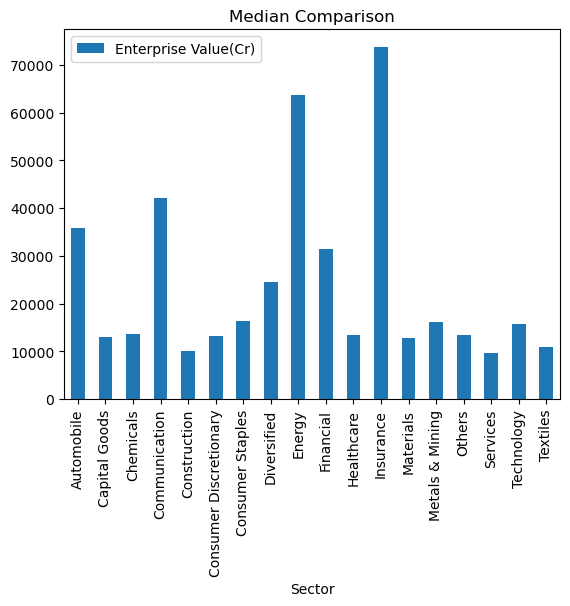

In [89]:
### First 
sector_median = df_stocks.groupby('Sector').agg({"Enterprise Value(Cr)":'median'}).plot.bar(stacked=True)
plt.title('Median Comparison')
plt.show()

In [90]:
Correlation = df_stocks['Dividend Per Share'].corr(df_stocks['Market Cap(Cr)'])
Correlation

0.04037095586290388

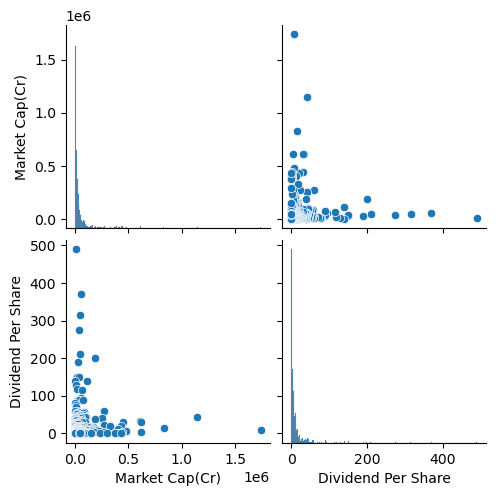

In [91]:
sns.pairplot(df_stocks[["Market Cap(Cr)","Dividend Per Share"]])
plt.show()

In [92]:
### Positive Company Count

df_industry = df_stocks[df_stocks['3-Year Return']>0].groupby('Industry')

In [93]:
positive_count= df_industry['Company'].count()

In [94]:
positive_count

Industry
ACs & Refrigerators    4
Abrasives              2
Air Transport          1
Aluminium              2
Aquaculture            1
                      ..
Tyres & Tubes          4
Vegetable oils         1
Welding machinery      1
Wires & cables         3
Wood                   1
Name: Company, Length: 127, dtype: int64

In [95]:
# Negative Company count

df_nag = df_stocks[df_stocks['3-Year Return']<0].groupby('Industry')

In [96]:
negative_count = df_nag['Company'].count()

In [97]:
negative_count

Industry
ACs & Refrigerators               2
Air Transport                     1
Asset Management Companies        1
Auto Ancillaries                  1
Banking                          10
Cement                            1
Communication Equipment           1
Construction                      2
Drugs & Pharma                    5
E-Commerce                        1
Food Processing                   1
Gems, Jewellery & Accessories     1
General Insurance                 1
Household & Personal Products     1
Housing Finance                   2
Lubricants & Grease               1
Media & Entertainment             1
Misc. Fin.services                5
Natural Gas Utilities             1
Oil Refineries & Marketing        3
Power Projects                    2
Reinsurance                       1
SIDCs/SFCs                        1
Storage Batteries                 2
Telecom Services                  1
Tobacco Products                  1
Name: Company, dtype: int64